In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
from utils.paths import *

import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
def get_scores_dataframe(dataset, dims, prefix=""):
    df = None

    for prueba in pruebas:
        path = os.path.join(scores_path, dataset, prueba, "%s%d.csv" % (prefix, dims))
        
        if os.path.exists(path):
            #print path
            if df is None:
                df = pd.read_csv(path, sep=',', header=0)
            else:
                new_df = pd.read_csv(path, sep=',', header=0)
                df = df.append(new_df, ignore_index=True)
    
    if df is None:
        return pd.DataFrame(columns=dataframe_columns)
                
    #se dejan disponibles solamente la tarea, el tipo de adaptacion y el error
    df_a = df[['Adaptacion', 'Tarea', 'Transfer loss']]
    
    # se manipula el dataframe para dejar la adaptacion como columna 
    df_a = df_a.groupby(['Tarea', 'Adaptacion'], as_index=True ).max()
    df_a = df_a.unstack(level=1)
    df_a.columns = df_a.columns.levels[1]
    
    return df_a

# Dataset Amazon

### El dataset Amazon posee las siguientes características:

| Dominio     | Entrenamiento | Prueba |  % Positivos  | No Etiquetados |
|-------------|---------------|--------|---------------|----------------|
| books       |     1600      | 400    |      50%      |      4465      |
| dvd         |     1600      | 400    |      50%      |      5945      |
| electronics |     1600      | 400    |      50%      |      5681      |
| kitchen     |     1600      | 400    |      50%      |      3586      |


# Transfer Loss - Amazon (3000 dimensiones) - Marco 1

In [4]:
dims = 3000
df_amazon = get_scores_dataframe(datasets[0], dims, "me1_")
df_amazon

Adaptacion,Baseline,GFK,PCA,SDA,mSDA
Tarea,,,,,
b->d,2.707568,3.390085,3.235081,3.190080,4.505113
b->e,7.957699,12.435311,10.462762,15.182880,12.600315
b->k,11.112778,8.032701,13.217830,11.927798,12.050301
d->b,10.650266,7.605190,14.427861,10.470262,7.627691
d->e,14.135353,10.295257,18.780470,16.537913,12.250306
d->k,9.495237,6.105153,12.215305,10.650266,8.517713
e->b,13.335333,13.337833,15.142879,16.230406,11.147779
e->d,11.710293,8.830221,13.222831,17.910448,10.475262
e->k,1.735043,1.715043,2.950074,4.465112,0.960024


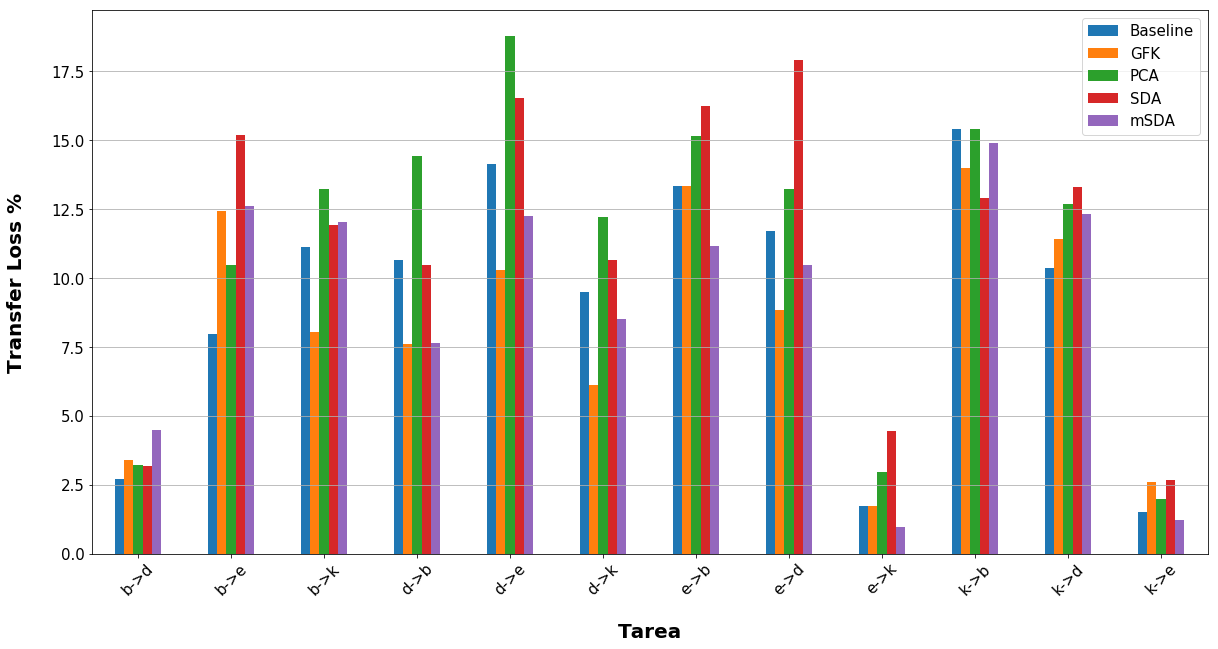

In [5]:
amazon_plot = df_amazon.plot(kind='bar', figsize=(20,10), rot=45, fontsize=15, legend=False)
patches, labels = amazon_plot.get_legend_handles_labels()

amazon_plot.legend(patches, labels, loc='best', fontsize=15)
amazon_plot.yaxis.grid(which='major')

amazon_plot.set_ylabel("Transfer Loss %", labelpad=25,fontsize=20, weight='bold')
amazon_plot.set_xlabel("Tarea", labelpad=25,fontsize=20, weight='bold')

figure_path = os.path.join(graficos_path, datasets[0], "me1_tloss_%d.png" % dims)
plt.savefig(figure_path, bbox_inches='tight')

# Transfer Loss - Amazon (1000 dimensiones) - Marco 1

In [4]:
dims = 1000
df_amazon = get_scores_dataframe(datasets[0], dims, "me1_")
df_amazon

Adaptacion,Baseline,GFK,PCA,SDA,mSDA
Tarea,,,,,
b->d,4.577614,1.110028,2.960074,5.530138,0.485012
b->e,12.297807,9.647741,10.035251,9.502738,3.805095
b->k,13.027826,6.065152,12.695317,11.812795,1.992550
d->b,10.672767,4.150104,6.625166,8.620216,0.907523
d->e,15.937898,6.972674,11.947799,10.510263,9.100228
d->k,13.120328,4.455111,8.462712,11.357784,5.157629
e->b,13.777844,9.150229,8.895222,14.410360,4.247606
e->d,14.505363,7.932698,6.257656,7.935198,7.742694
e->k,2.017550,-0.727518,1.022526,1.585040,-0.822521


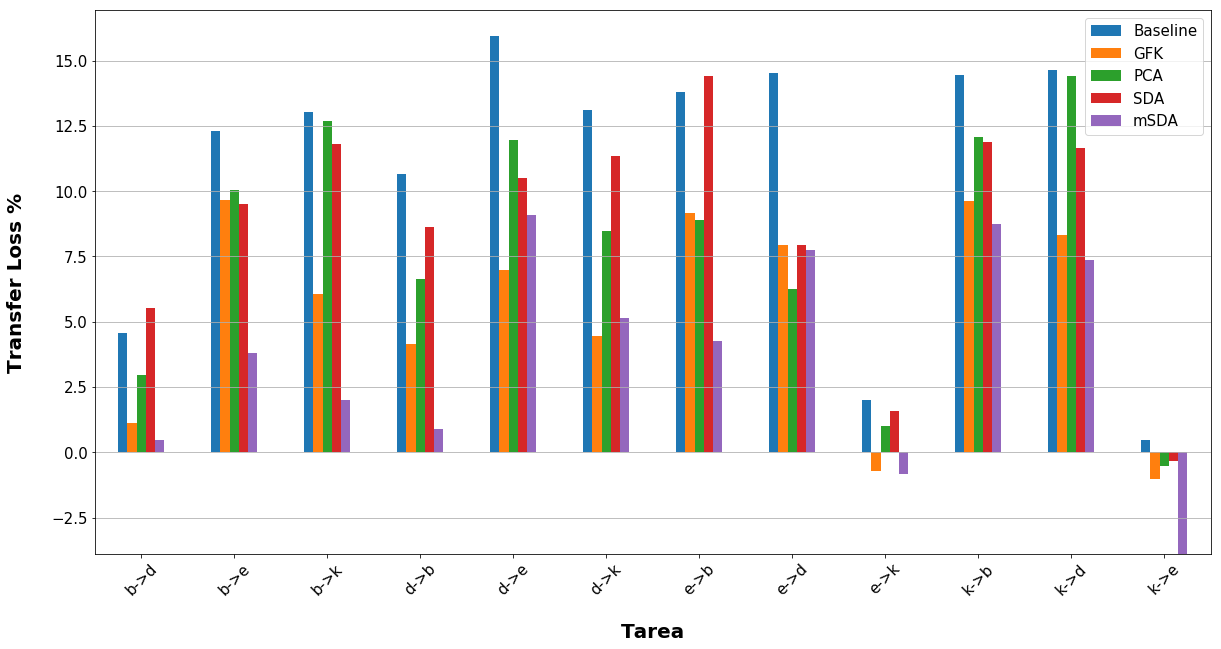

In [5]:
amazon_plot = df_amazon.plot(kind='bar', figsize=(20,10), rot=45, fontsize=15, legend=False)
patches, labels = amazon_plot.get_legend_handles_labels()

amazon_plot.legend(patches, labels, loc='best', fontsize=15)
amazon_plot.yaxis.grid(which='major')

amazon_plot.set_ylabel("Transfer Loss %", labelpad=25,fontsize=20, weight='bold')
amazon_plot.set_xlabel("Tarea", labelpad=25,fontsize=20, weight='bold')

figure_path = os.path.join(graficos_path, datasets[0], "me1_tloss_%d.png" % dims)
plt.savefig(figure_path, bbox_inches='tight')

# Transfer Loss - Amazon (3000 dimensiones) - Marco 2

In [4]:
dims = 3000
df_amazon = get_scores_dataframe(datasets[0], dims, "me2_")
df_amazon

Adaptacion,Baseline,GFK,PCA,SDA,mSDA
Tarea,,,,,
b->d,2.707568,1.840046,2.685067,5.992650,4.032601
b->e,7.957699,11.372784,8.400210,18.252956,10.395260
b->k,11.112778,7.495187,13.562839,12.232806,13.577839
d->b,10.650266,8.700218,10.727768,9.225231,5.355134
d->e,14.135353,11.340284,15.382885,17.227931,17.610440
d->k,9.495237,4.752619,12.302808,9.147729,16.660417
e->b,13.335333,13.305333,14.880372,11.080277,13.562839
e->d,11.710293,8.615215,11.737793,13.292832,11.015275
e->k,1.735043,2.205055,1.347534,4.495112,3.155079


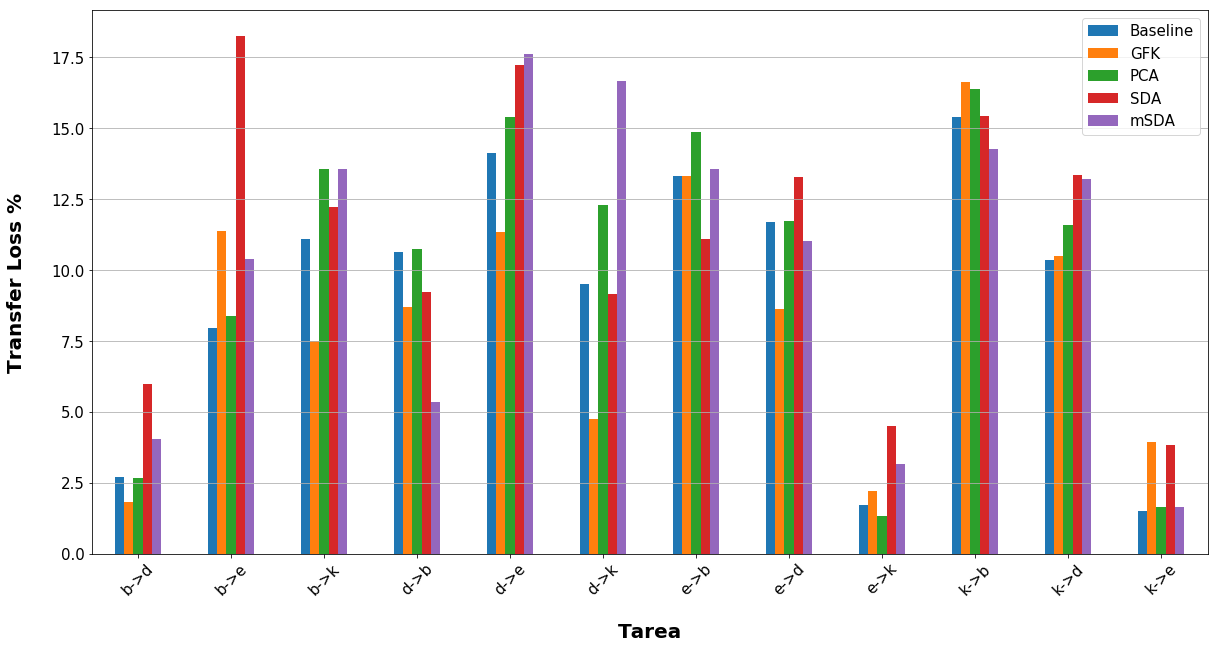

In [5]:
amazon_plot = df_amazon.plot(kind='bar', figsize=(20,10), rot=45, fontsize=15, legend=False)
patches, labels = amazon_plot.get_legend_handles_labels()

amazon_plot.legend(patches, labels, loc='best', fontsize=15)
amazon_plot.yaxis.grid(which='major')

amazon_plot.set_ylabel("Transfer Loss %", labelpad=25,fontsize=20, weight='bold')
amazon_plot.set_xlabel("Tarea", labelpad=25,fontsize=20, weight='bold')

figure_path = os.path.join(graficos_path, datasets[0], "me2_tloss_%d.png" % dims)
plt.savefig(figure_path, bbox_inches='tight')

# Transfer Loss - Amazon (1000 dimensiones) - Marco 2

In [10]:
dims = 1000
df_amazon = get_scores_dataframe(datasets[0], dims, "me2_")
df_amazon

Adaptacion,Baseline,GFK,PCA,SDA,mSDA
Tarea,,,,,
b->d,4.577614,0.782520,5.760144,5.275132,0.170004
b->e,12.297807,9.865247,12.515313,18.075452,12.195305
b->k,13.027826,6.422661,10.022751,14.777869,6.110153
d->b,10.672767,5.162629,2.472562,7.010175,-0.260007
d->e,15.937898,10.012750,10.175254,9.690242,15.130378
d->k,13.120328,2.167554,9.437736,9.280232,4.702618
e->b,13.777844,9.640241,6.855171,16.417910,7.700193
e->d,14.505363,6.827671,8.105203,11.835296,9.625241
e->k,2.017550,-1.202530,-1.017525,1.882547,0.992525


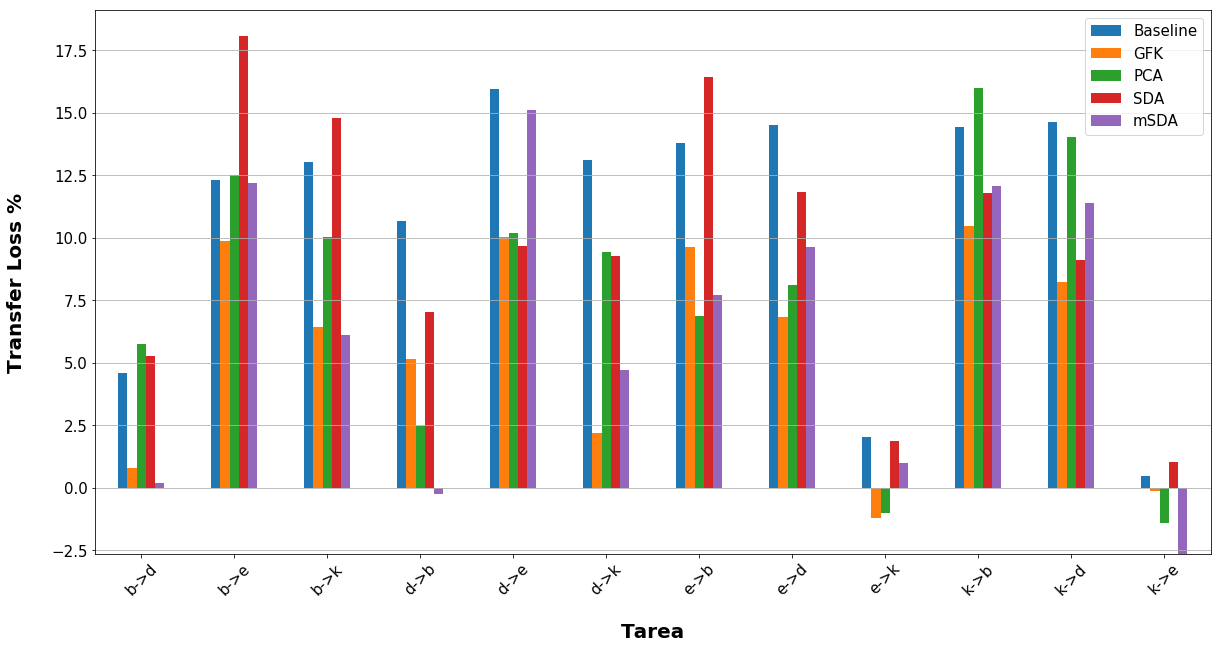

In [11]:
amazon_plot = df_amazon.plot(kind='bar', figsize=(20,10), rot=45, fontsize=15, legend=False)
patches, labels = amazon_plot.get_legend_handles_labels()

amazon_plot.legend(patches, labels, loc='best', fontsize=15)
amazon_plot.yaxis.grid(which='major')

amazon_plot.set_ylabel("Transfer Loss %", labelpad=25,fontsize=20, weight='bold')
amazon_plot.set_xlabel("Tarea", labelpad=25,fontsize=20, weight='bold')

figure_path = os.path.join(graficos_path, datasets[0], "me2_tloss_%d.png" % dims)
plt.savefig(figure_path, bbox_inches='tight')

# Gráficos del dataset Twitter (2000 dimensiones)


### El dataset Twitter posee las siguientes características:

| Dominio  | Entrenamiento | Prueba |  Total  |
|----------|---------------|--------|---------|
| thevoice |      518      |   130  |   648   |
| rio2016  |      380      |   96   |   476   |


# Transfer Loss - Twitter (2000 dimensiones) - Marco 1

In [7]:
dims = 2000
df_twitter = get_scores_dataframe(datasets[1], dims, "me1_")
df_twitter

Adaptacion,Baseline,GFK,PCA,SDA,mSDA
Tarea,,,,,
g->r,13.974592,13.929220,17.286751,21.823956,9.709619
g->t,15.873580,21.354167,12.405303,20.785985,7.812500
r->g,16.118364,17.294151,16.624896,15.436944,17.725633
r->t,13.482481,17.732008,14.512311,21.425189,13.920455
t->g,12.876514,14.491816,13.035795,14.807623,13.388783
t->r,3.539020,13.929220,3.266788,16.878403,1.542650


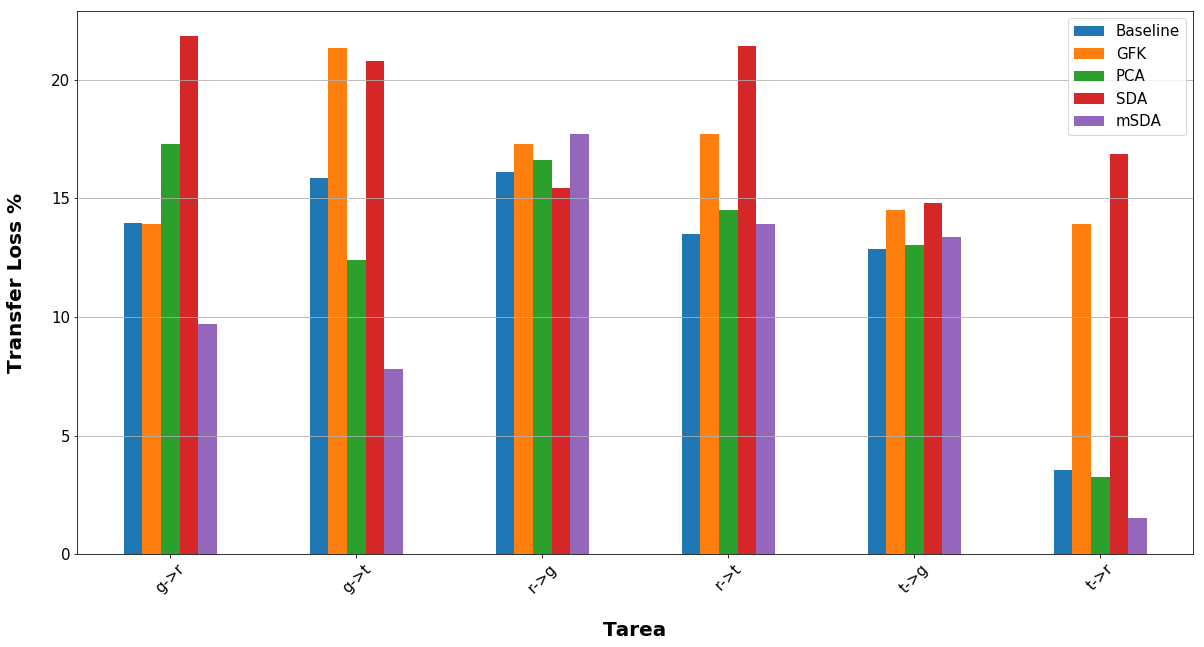

In [8]:
twitter_plot = df_twitter.plot(kind='bar', figsize=(20,10), rot=45, fontsize=15, legend=False)
patches, labels = twitter_plot.get_legend_handles_labels()

twitter_plot.legend(patches, labels, loc='best', fontsize=15)
twitter_plot.yaxis.grid(which='major')

twitter_plot.set_ylabel("Transfer Loss %", labelpad=25,fontsize=20, weight='bold')
twitter_plot.set_xlabel("Tarea", labelpad=25,fontsize=20, weight='bold')

figure_path = os.path.join(graficos_path, datasets[1], "me1_tloss_%d.png" % dims)
plt.savefig(figure_path, bbox_inches='tight')

# Transfer Loss - Twitter (1000 dimensiones) - Marco 1

In [16]:
dims = 1000
df_twitter = get_scores_dataframe(datasets[1], dims, "me1_")
df_twitter

Adaptacion,Baseline,GFK,PCA,SDA,mSDA
Tarea,,,,,
g->r,13.520871,13.248639,8.303085,17.150635,6.079855
g->t,11.896307,17.897727,11.813447,23.982008,7.339015
r->g,17.034344,16.199381,17.399267,16.709356,16.662076
r->t,13.245739,14.417614,11.150568,14.464962,9.138258
t->g,14.121843,14.585456,16.742864,12.634149,13.813839
t->r,5.036298,16.923775,3.720508,7.940109,1.270417


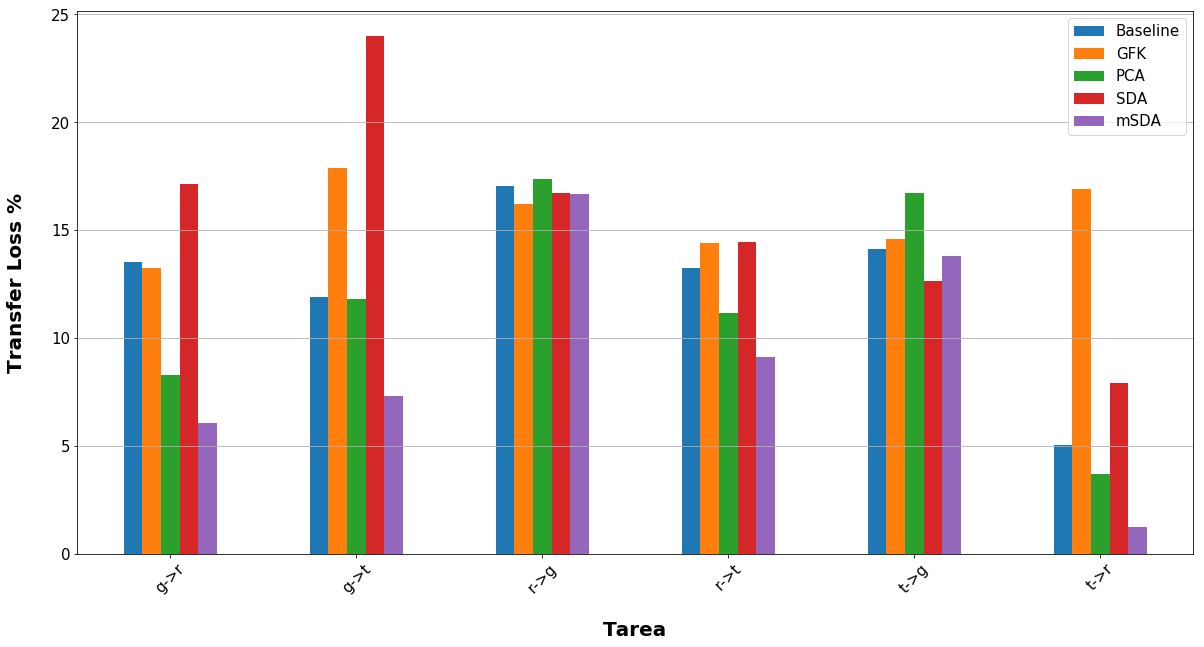

In [17]:
twitter_plot = df_twitter.plot(kind='bar', figsize=(20,10), rot=45, fontsize=15, legend=False)
patches, labels = twitter_plot.get_legend_handles_labels()

twitter_plot.legend(patches, labels, loc='best', fontsize=15)
twitter_plot.yaxis.grid(which='major')

twitter_plot.set_ylabel("Transfer Loss %", labelpad=25,fontsize=20, weight='bold')
twitter_plot.set_xlabel("Tarea", labelpad=25,fontsize=20, weight='bold')

figure_path = os.path.join(graficos_path, datasets[1], "me1_tloss_%d.png" % dims)
plt.savefig(figure_path, bbox_inches='tight')

# Transfer Loss - Twitter (2000 dimensiones) - Marco 2

In [9]:
dims = 2000
df_twitter = get_scores_dataframe(datasets[1], dims, "me2_")
df_twitter

Adaptacion,Baseline,GFK,PCA,SDA,mSDA
Tarea,,,,,
g->r,13.974592,13.112523,9.618875,15.471869,9.301270
g->t,15.873580,18.726326,11.339962,23.035038,10.392992
r->g,16.118364,16.977425,16.486271,16.426139,17.690747
r->t,13.482481,16.690341,13.517992,14.275568,17.945076
t->g,12.876514,11.748694,13.525113,14.915035,14.158565
t->r,3.539020,16.061706,3.539020,6.215971,0.544465


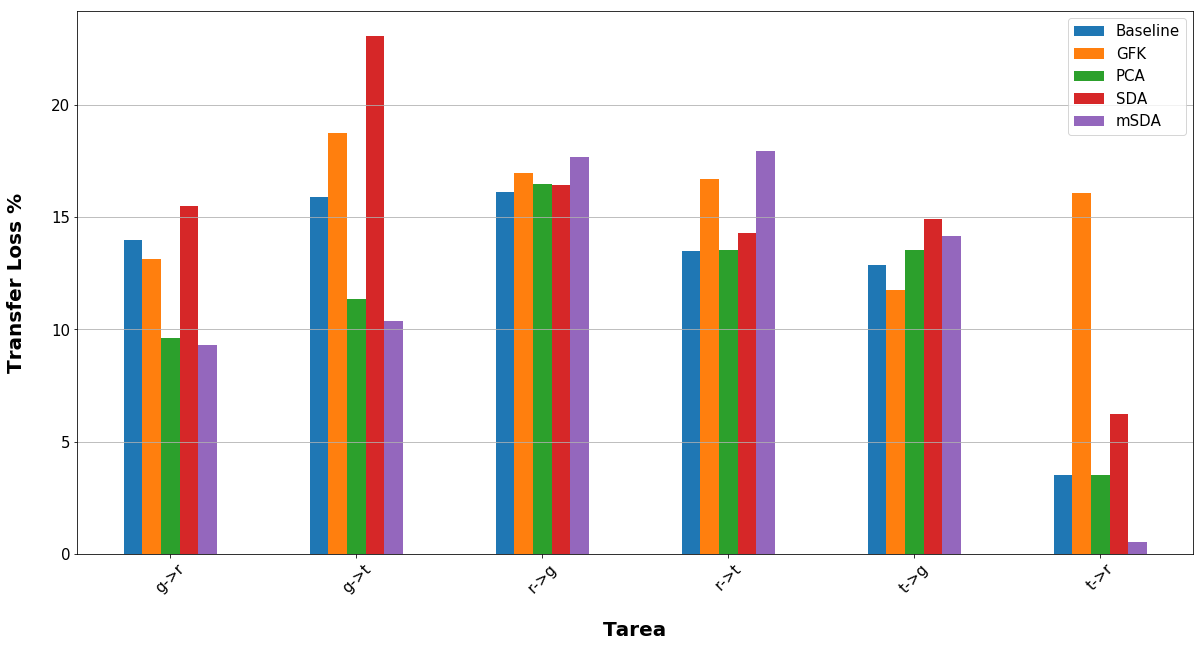

In [10]:
twitter_plot = df_twitter.plot(kind='bar', figsize=(20,10), rot=45, fontsize=15, legend=False)
patches, labels = twitter_plot.get_legend_handles_labels()

twitter_plot.legend(patches, labels, loc='best', fontsize=15)
twitter_plot.yaxis.grid(which='major')

twitter_plot.set_ylabel("Transfer Loss %", labelpad=25,fontsize=20, weight='bold')
twitter_plot.set_xlabel("Tarea", labelpad=25,fontsize=20, weight='bold')

figure_path = os.path.join(graficos_path, datasets[1], "me2_tloss_%d.png" % dims)
plt.savefig(figure_path, bbox_inches='tight')

# Transfer Loss - Twitter (1000 dimensiones) - Marco 2

In [4]:
dims = 1000
df_twitter = get_scores_dataframe(datasets[1], dims, "me2_")
df_twitter

Adaptacion,Baseline,GFK,PCA,SDA,mSDA
Tarea,,,,,
g->r,13.520871,10.798548,8.666062,24.137931,4.854809
g->t,11.896307,14.607008,12.713068,11.079545,8.096591
r->g,17.034344,16.316891,17.960653,15.427305,17.131657
r->t,13.245739,15.293561,11.789773,15.459280,16.122159
t->g,14.121843,13.672460,15.044938,13.032581,14.202172
t->r,5.036298,19.419238,3.402904,6.306715,2.586207


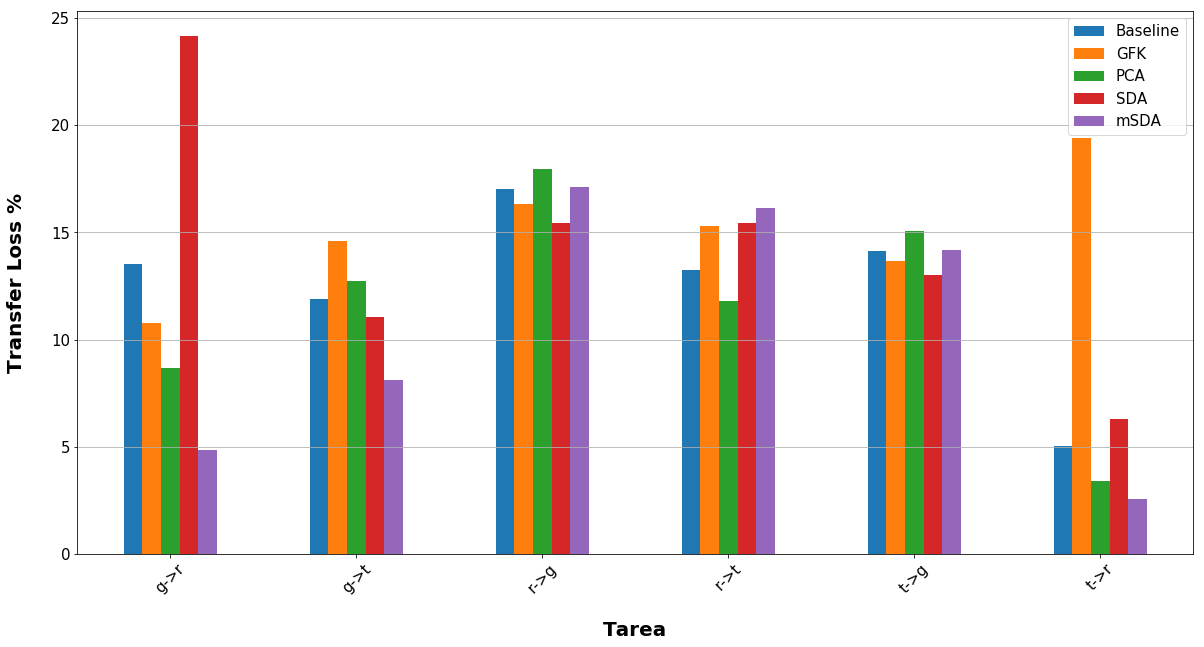

In [5]:
twitter_plot = df_twitter.plot(kind='bar', figsize=(20,10), rot=45, fontsize=15, legend=False)
patches, labels = twitter_plot.get_legend_handles_labels()

twitter_plot.legend(patches, labels, loc='best', fontsize=15)
twitter_plot.yaxis.grid(which='major')

twitter_plot.set_ylabel("Transfer Loss %", labelpad=25,fontsize=20, weight='bold')
twitter_plot.set_xlabel("Tarea", labelpad=25,fontsize=20, weight='bold')

figure_path = os.path.join(graficos_path, datasets[1], "me2_tloss_%d.png" % dims)
plt.savefig(figure_path, bbox_inches='tight')

# Gráficos de Tiempo con el dataset Amazon (3000 dimensiones)
# Marco Experimental 1

In [6]:
def get_times_dataframe(prefix=""):
    df = None
    
    for prueba in pruebas:
        if prueba is not "baseline":
            file_path = os.path.join(times_path, "%s%s.csv" % (prefix, prueba))
            
            if os.path.exists(file_path):
                if df is None:
                    df = pd.read_csv(file_path, sep=',', header=0)
                else:
                    new_df = pd.read_csv(file_path, sep=',', header=0)
                    df = df.append(new_df, ignore_index=True)
    
    if df is None:
        return pd.DataFrame(columns=dataframe_time_columns)
    
    return df[dataframe_time_columns]

In [7]:
df_tiempos = get_times_dataframe("me1_")

In [8]:
df_tiempos = df_tiempos.sort_values('Tiempo').reset_index()[dataframe_time_columns]
df_tiempos.index = df_tiempos['Adaptacion']

In [9]:
df_tiempos

,Adaptacion,Tiempo
Adaptacion,,
PCA (n=750),PCA (n=750),0.360805
PCA (n=1500),PCA (n=1500),0.751653
mSDA (l=1),mSDA (l=1),2.368892
"SDA (l=1, epochs=25)","SDA (l=1, epochs=25)",7.076742
mSDA (l=3),mSDA (l=3),7.107120
mSDA (l=5),mSDA (l=5),11.863423
"SDA (l=3, epochs=25)","SDA (l=3, epochs=25)",12.715725
"SDA (l=1, epochs=50)","SDA (l=1, epochs=50)",13.916246
"SDA (l=5, epochs=25)","SDA (l=5, epochs=25)",18.425558


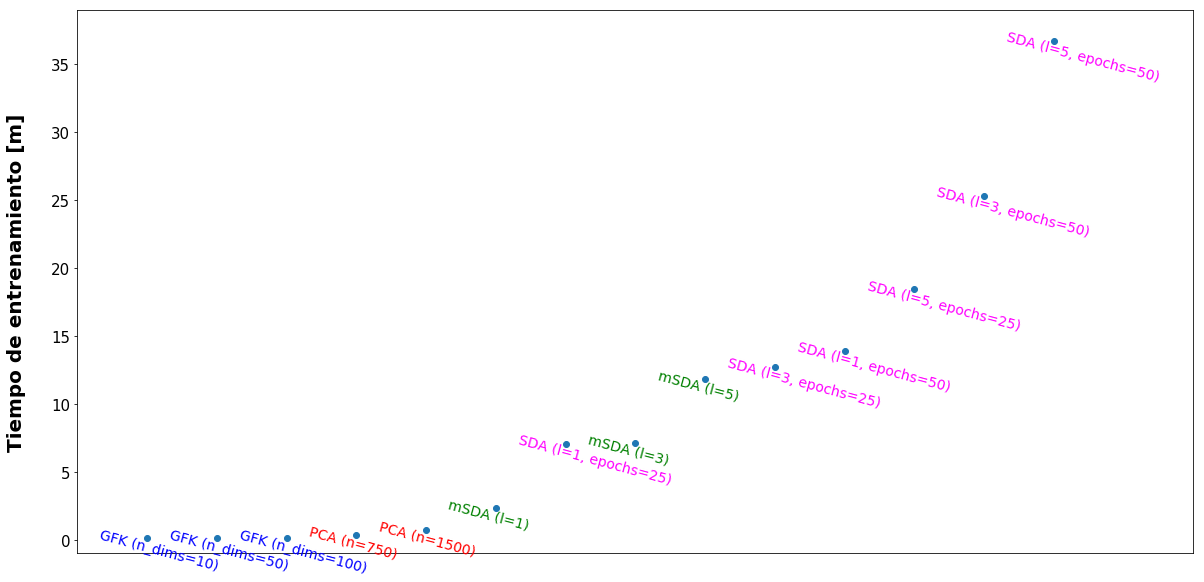

In [16]:
colores = {
    "GFK": 'blue',
    'PCA': 'red',
    'mSDA': 'green',
    'SDA': 'magenta',
}

time_plot = df_tiempos.plot(style='o', figsize=(20,10), rot=65, fontsize=15, legend=False,
                            xlim=(-1, 15), ylim=(-1, 39))
time_plot.set_ylabel("Tiempo de entrenamiento [m]", labelpad=25,fontsize=20, weight='bold')
time_axes = time_plot.axes

xaxis = time_axes.xaxis
xaxis.set_visible(False)


time_fig = time_plot.figure
ax = time_fig.add_subplot(111)

for i in xrange(df_tiempos.shape[0]):
    i
    y = df_tiempos['Tiempo'][i]
    text = df_tiempos['Adaptacion'][i]
    color = colores[text.split(" ")[0]]
    #ax.annotate(text, xy=(i, y), xytext=(i-0.5, y+0.003))
    ax.text(i-0.7, y+0.004, text, fontsize=14, rotation=-15, color=color)
    
figure_path = os.path.join(graficos_path, datasets[0], "tiempos_%d.png" % dims)
plt.savefig(figure_path, bbox_inches='tight')